
# **CS2IAI Introduction to Artificial Intelligence**

Prepaped by Dr Amal Htait

**In this practical session we will learn about informed search strategies**


Read through the notebook, then answer the exercise questions. Your answers should be added in code cells.

The main **informed search** strategies are:
1.   Best First Search
2.   A* Search

Same as the uniformed search algorithms, the informed algorithms can be applied to traverse graphs or trees. To represent such data structures in Python, all we need to use is a dictionary where the vertices (or nodes) will be stored as keys and the adjacent vertices as values.

The following is an example graph which we'll be using in the tasks.

```
graph G =  { 'A':[['B',2], ['C',5]], 
             'B':[['D',4], ['E',6]], 
             'C':[['F',3], ['G',2]],
             'D':[],
             'E':[],
             'F':[],
             'G':[] 
            }
```

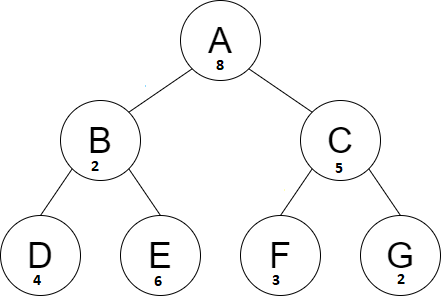

# **Exercise 1: Best First Search**

Best First Search uses the concept of a **Priority queue** and **heuristic search**. Best-first search algorithm visits next state based on heuristics function f(n) = h with lowest heuristic value (often called greedy). It doesn't consider cost of the path to that particular state (g).

To search the graph space, the Best First Search method uses two lists for tracking the traversal. An ‘Open’ list that keeps track of the current ‘immediate’ nodes available for traversal and a ‘CLOSED’ list that keeps track of the nodes already traversed.

Write the missing parts of the **Best First Search** function in Python language, you can use the given guidance steps:


1. Create 2 empty lists: *OPEN* and *CLOSED*
2. Start from the initial full node (say *['N',[N's children nodes]]*) and put it in the *OPEN* list.
3. Repeat the next steps as long as the list *OPEN* has nodes, or until the *GOAL* node is reached
4. print *OPEN*, just to monitor the search.
5. Reorder the *OPEN* list by the h value (*open.sort(key=lambda x: x[1])*)
6. Select the first/top node (say N) in the *OPEN* list and move it to the *CLOSED* list. 
7. If N is the *GOAL* node, exit the loop using just *return*, and change the value of *state*. 
8. If N is not the *GOAL* node, expand node N to generate the ‘immediate’ next nodes (Children nodes) linked to node N and add all those to the *OPEN* list (IF they are not already in *OPEN* and they are not already in *CLOSED*). 
9. Reorder the OPEN list by the h value (*open.sort(key=lambda x: x[1])*).

In [ ]:
def best_first_search(map, start, goal):
    
    # Create lists for open nodes and closed nodes
    open = []
    closed = []
    state = False

    # Add the start node
    open = [[start, map[start]]]

    while len(open) > 0 and state == False: # loop while open is not empty and we didn't fing goal yet
        # Sort the open list to get the node with the lowest h value first
        print (open)
        open.sort(key=lambda x: x[1])

        # Get the node with the lowest h value
        current_node = open.pop(0) 

        # Add the current node to the closed list
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ***************************************************

        #If N is the GOAL node, exit the loop.
        if current_node[0] == goal:
          print("Path=",closed)
          # ***************************************************
          # INSERT YOUR CODE HERE
          # ***************************************************

        #Else if N is not the GOAL node, expand node N to generate the ‘immediate’ next nodes (Children nodes) linked to node N and add all those to the OPEN list (IF they are not already in OPEN and they are not already in CLOSED).
        else:  
          # ***************************************************
          # INSERT YOUR CODE HERE
          # ***************************************************
          print(open) 
          #Reorder the OPEN list by the h value
          open.sort(key=lambda x: x[1])

    return state


#TEST
thisgraph = { 'A':[['B',2], ['C',5]], 
                'B':[['D',4], ['E',6]], 
                'C':[['F',3], ['G',2]],
                'D':[],
                'E':[],
                'F':[],
                'G':[] 
              }

# TEST
best_first_search(thisgraph, 'A', 'F')

# **Advanced - Exercise 2: A* Search/Path-finding**

**A* search** algorithm visits next state based on heuristics **f(n) = h + g** where **h** component is same heuristics applied as in Best-first search but **g** component is path from the initial state to the particular state. Therefore it doesn't chooses next state only with lowest heuristics value but one that gives lowest value when considering it's heuristics and cost of getting to that state (g).


**A* algorithm**, same as Best-first, searches for the shortest path between the initial and the final state, therefore, it searches the path with smallest **f(n)**. Therefore, both algorithms have a similar syntax, except for calculating the f(n) cost. In this Task, contrary to *Excercice 1*, we'll need to build the search tree during the search.


*An illustration of a path finder, from point 0 to point 19:*

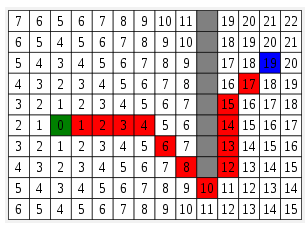

**Exercise 2.1**

The following code section is a solution to the path-finding problem in Python with the function ”A* Search” to be completed. Write the A* search function in Python language. The function should return a list of tuples as a path from the given start to the given end (or goal) in the given maze (or grid). You can use the given guidance steps:



1. Create the *start* and *end* nodes from the parameters.
2. Initialize both open and closed list: *openList* and *closedList*.
3. Add the start node: put the *start* in the *openList*.
4. Loop while the *openList* is not empty.
    * Get the current node: let the currentNode equal the node with the least f value, reorder the openList by the f value (openList.sort(key=lambda x: x.f)), remove the currentNode from the openList, add the currentNode to the closedList.
    * If currentNode is the goal then you've found the end! 
    * Else, generate node's children and add them to a list: let the children of the currentNode equal the adjacent nodes (in a grid the node's surrounding children has its location combined with one of the following values = [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)] )
    * for each child in the children: 
            * If the child is in the closedList, use "continue".
            * Create the f, g, and h values: 
                * child.g = currentNode.g + 1 ( 1 is the distance between child and current) 
                * child.h = distance from child to end (if child's location is (a,b) and end's location is (x,y), then child.h will be (a-x)^2+(b-y)^2.
                * child.f = child.g + child.h

             * If child.position is in the openList's nodes positions, if the child.g is higher than the openList node's g, *continue* to beginning of for loop
             * Add the child to the openList, add the child to the openList

In [ ]:
################################################### Class Declaration #####################################################
class Node():

     def __init__(self, parent=None, position=None):
         self.parent = parent
         self.position = position

         self.g = 0
         self.h = 0
         self.f = 0

     def __eq__(self, other):
         return self.position == other.position
    
#####################################################################################################################
######################################## Implementation of A*  ######################################################  
def astar(maze, start, end):

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop "current" off open list, add it to closed list
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ***************************************************

        # Is the goal found?
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                # Add current position in path
                # ***************************************************
                # INSERT YOUR CODE HERE
                # ***************************************************
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children or Adjacent squares
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: 
            node_position = (0,0)
            # Get node position (X, Y): hint = node position X is equal to current_node X  + new_position X
            # ***************************************************
            # INSERT YOUR CODE HERE
            # ***************************************************

            # Make sure the position is within range (inside the grid), If it's out of range "continue" (to return the control to the beginning of the loop)
            # ***************************************************
            # INSERT YOUR CODE HERE
            # ***************************************************

            # Make sure it is a walkable terrain by checking the position in the maze, the value shld be different then 0, If not then "continue"
            # ***************************************************
            # INSERT YOUR CODE HERE
            # ***************************************************

            # Create new node
            new_node = Node(current_node, node_position)

            # Add the node to Children list
            # ***************************************************
            # INSERT YOUR CODE HERE
            # ***************************************************


        # Loop through children
        for child in children:

            # If Child is in the closed list, "continue"
            # ***************************************************
            # INSERT YOUR CODE HERE
            # ***************************************************

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # If Child is already in the open list and child.g is greater that open_node.g, "continue"
            # ***************************************************
            # INSERT YOUR CODE HERE
            # ***************************************************

            # Add the child to the open list
            open_list.append(child)
  

#####################################################################################################################
######################################## Implementation of Main  ####################################################
def main():

    maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

    start = (0, 0)
    end = (7, 6)

    path = astar(maze, start, end)
    print(path)


if __name__ == '__main__':
     main()
    
######################################################################################################################
################################################### THE END ##########################################################
######################################################################################################################